# installing necessary Modules

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost tensorflow

# importing all the necessary libraries

In [2]:
# Install XGBoost and TensorFlow separately to ensure they're available
!pip install xgboost
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# loading datasets

In [4]:
# loading datasets
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

# Adding a new column 'Location' to every csv files to identify the location

In [5]:
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

print("Merged Data Head:")
merged_data.head()

Merged Data Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


# Saving the merged dataset to a new CSV file

In [6]:
merged_data.to_csv('merged_locations.csv', index=False)

# Initial Data Inspection

In [7]:
# see the basic information about the dataset
print("\nDataset Info:")
merged_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [8]:
# To check the duplicated rows
print(f"\nNumber of duplicate rows: {merged_data.duplicated().sum()}")


Number of duplicate rows: 0


# Data Cleaning & Preprocessing

## Remove Timestamp Column

In [9]:
# remove the 'Time' column
if 'Time' in merged_data.columns:
    merged_data = merged_data.drop('Time', axis=1)
    print("\n'Time' column dropped.")
else:
    print("\n'Time' column not found.")


'Time' column dropped.


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Target Variable: Power

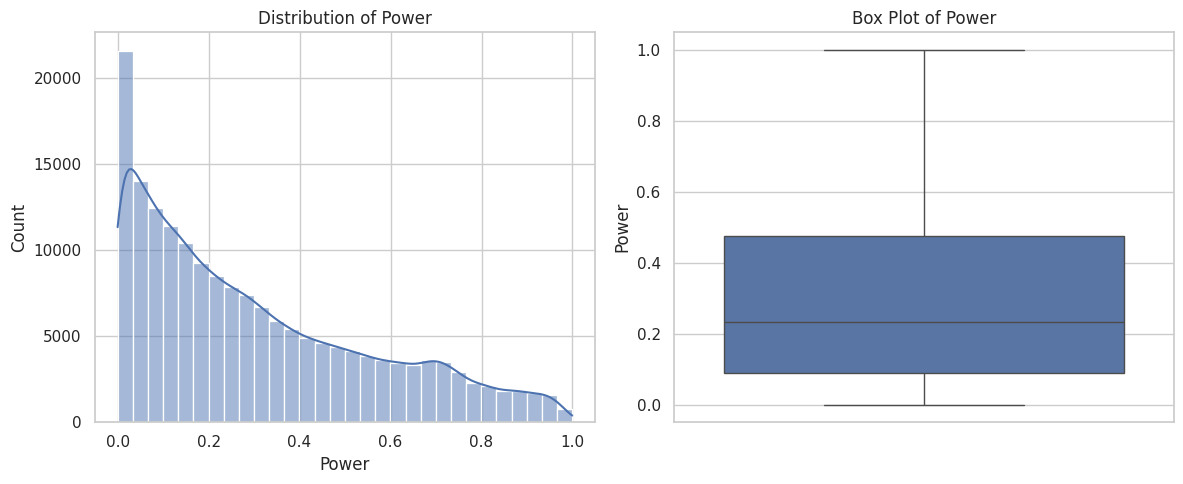

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_data['Power'], kde=True, bins=30)
plt.title('Distribution of Power')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Power'])
plt.title('Box Plot of Power')

plt.tight_layout()
plt.show()

### Numerical Features


Distributions of Numerical Features:


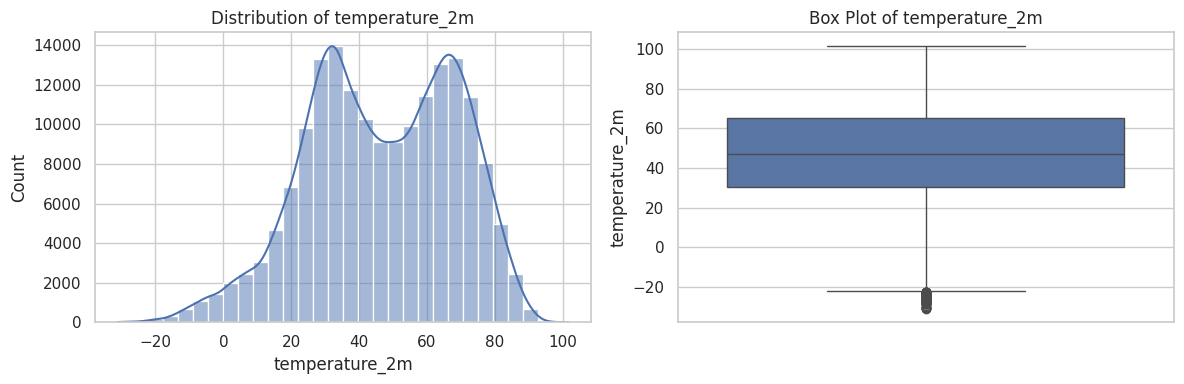

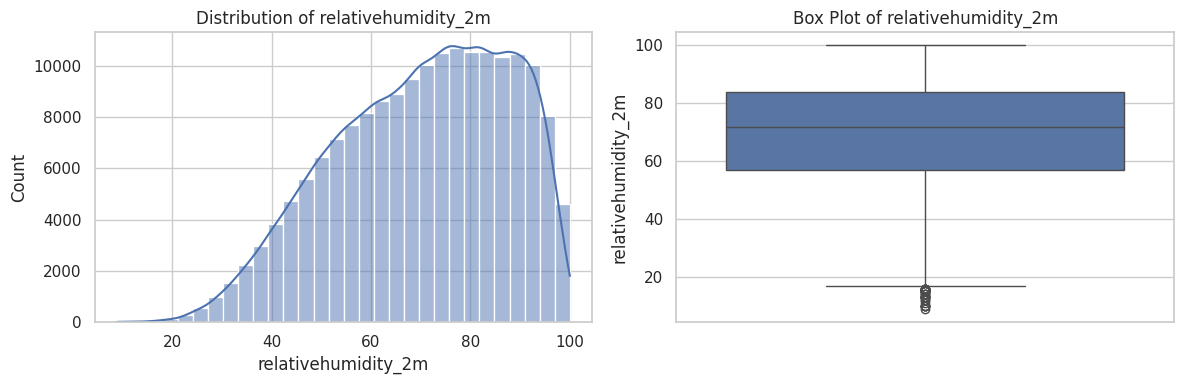

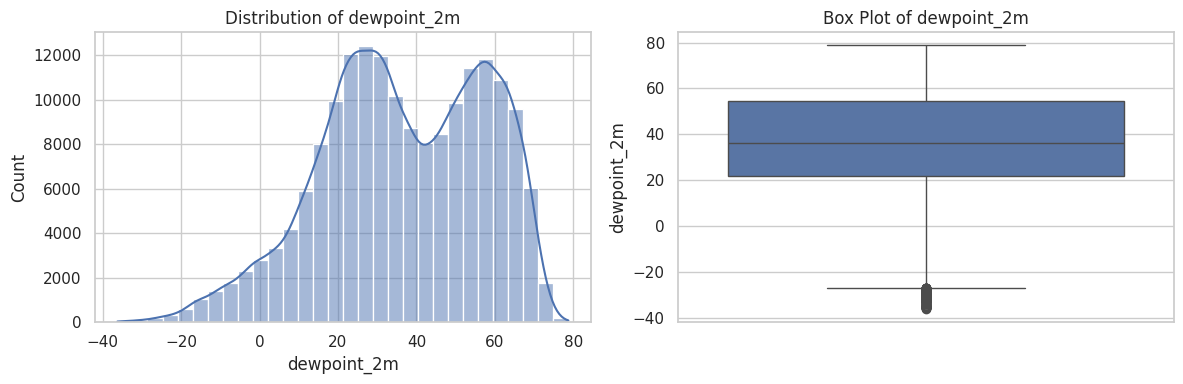

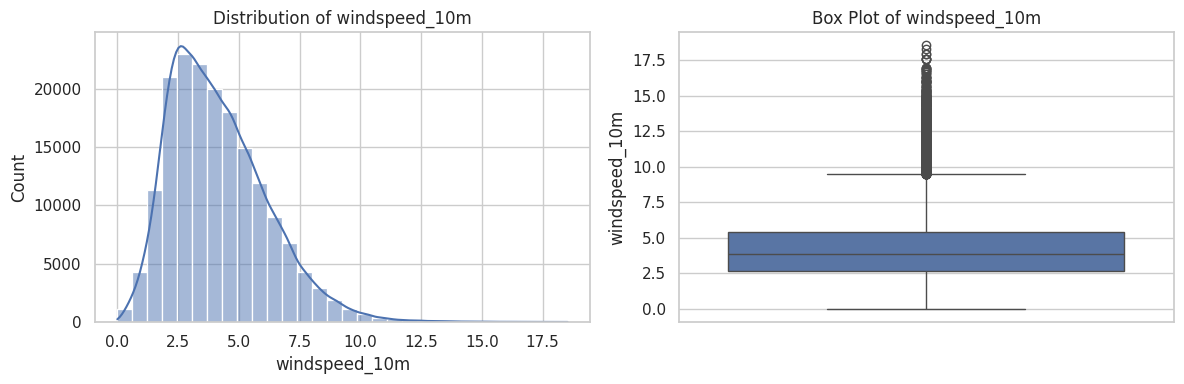

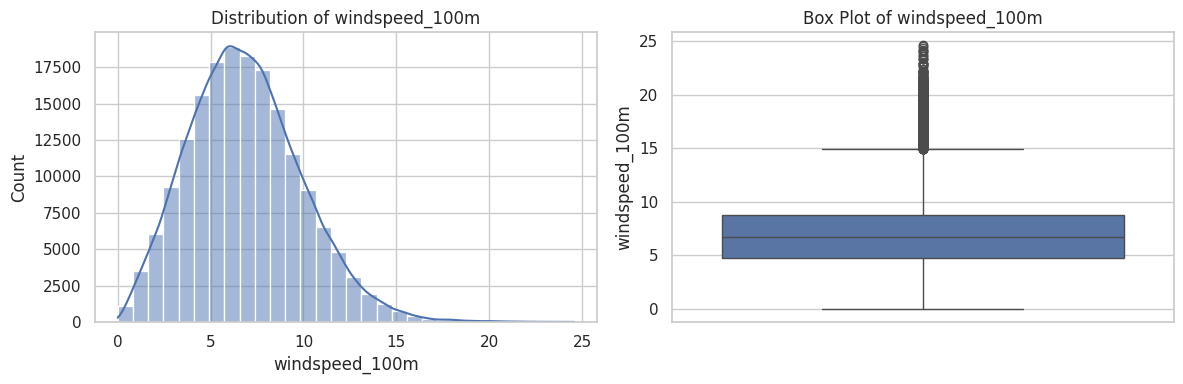

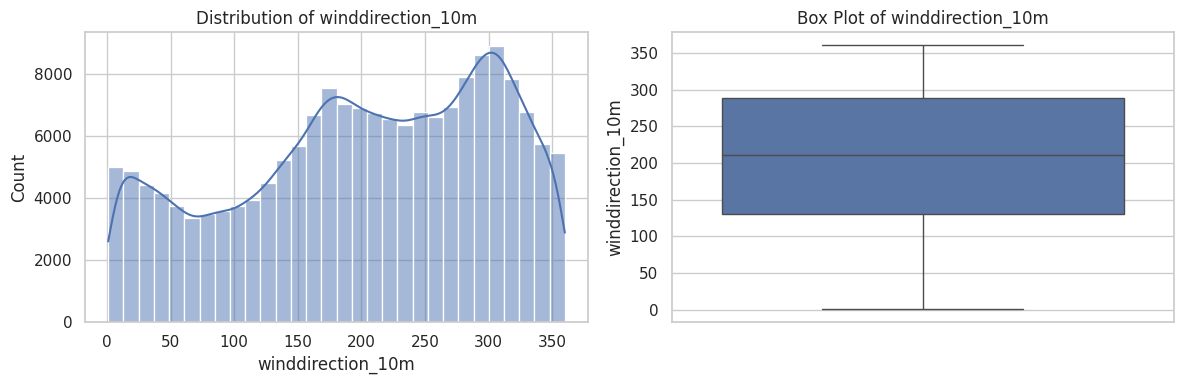

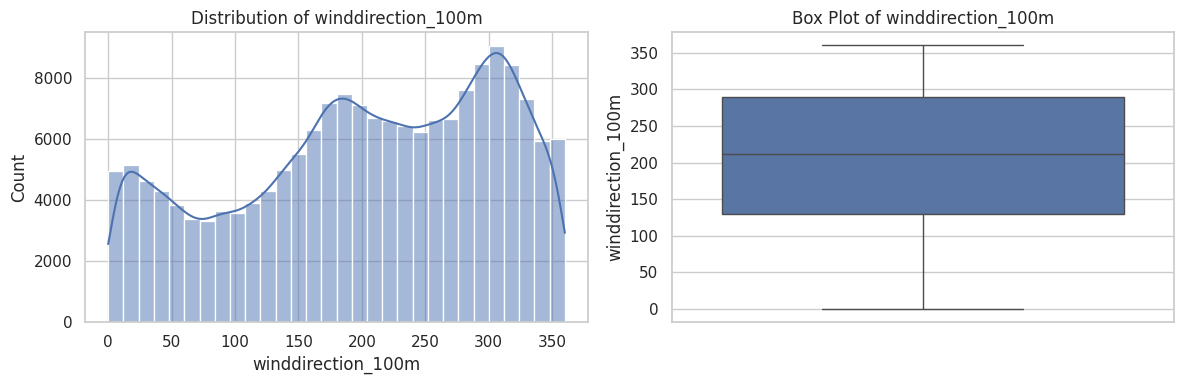

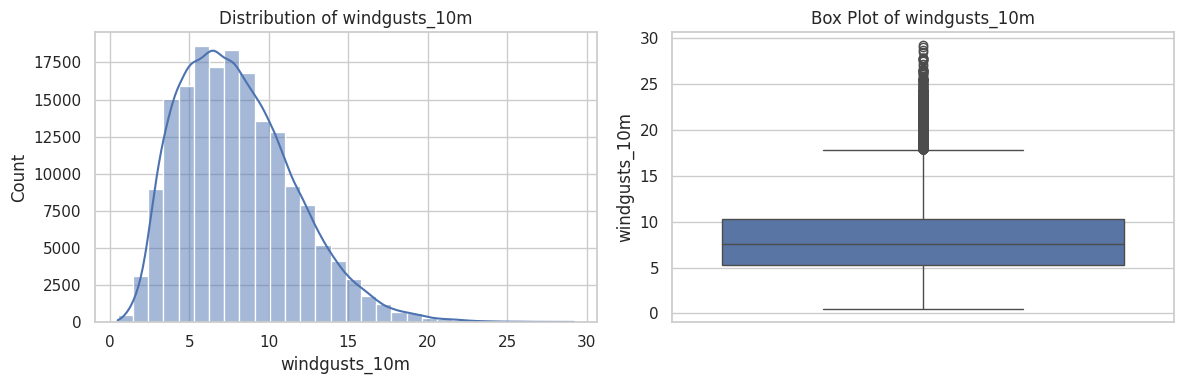

In [11]:
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                      'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                      'winddirection_100m', 'windgusts_10m']

print("\nDistributions of Numerical Features:")
for col in numerical_features:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(merged_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=merged_data[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

### Categorical Feature: Location

<ipython-input-12-5077979e3ebd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=merged_data, palette='pastel')


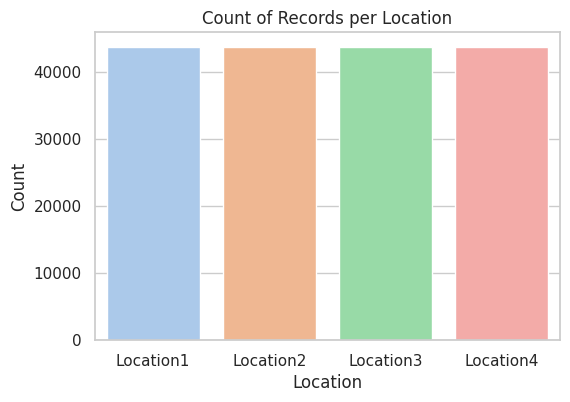

In [12]:
if 'Location' in merged_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Location', data=merged_data, palette='pastel')
    plt.xlabel('Location')
    plt.ylabel('Count')
    plt.title('Count of Records per Location')
    plt.show()
else:
    print("\n'Location' column already encoded or removed.")

## Bivariate Analysis

### Numerical Features vs. Power


Scatter Plots of Numerical Features vs. Power:


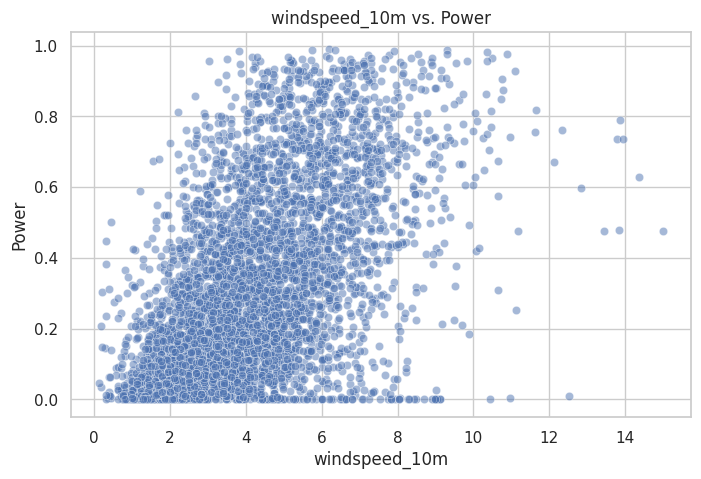

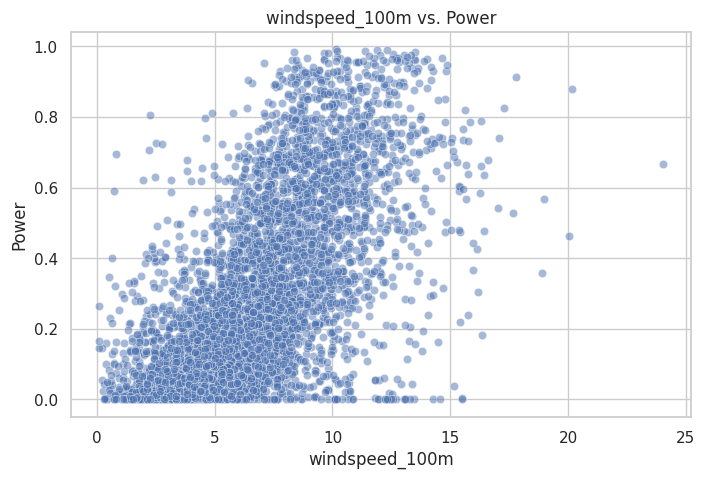

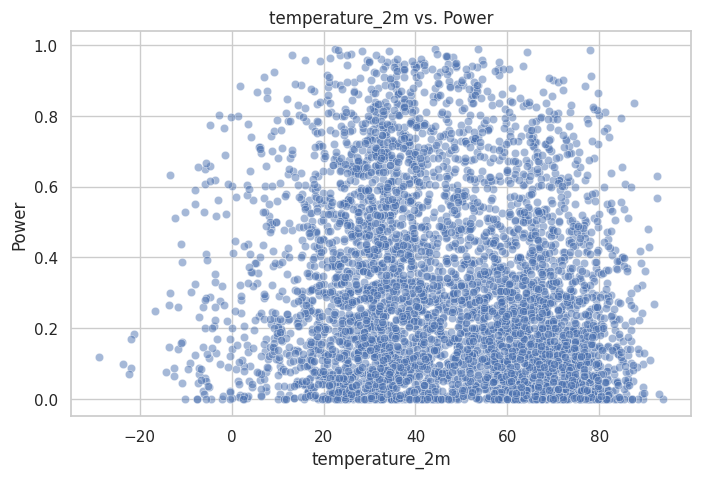

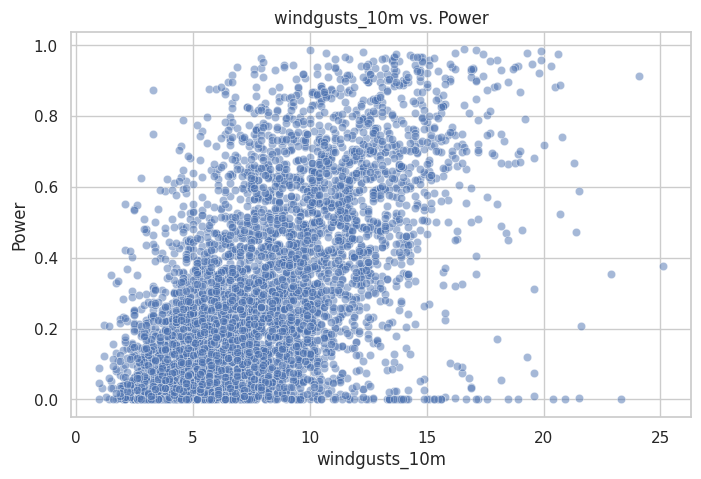


Line Plots of Numerical Features vs. Power:


<ipython-input-13-a3c1744c6886>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


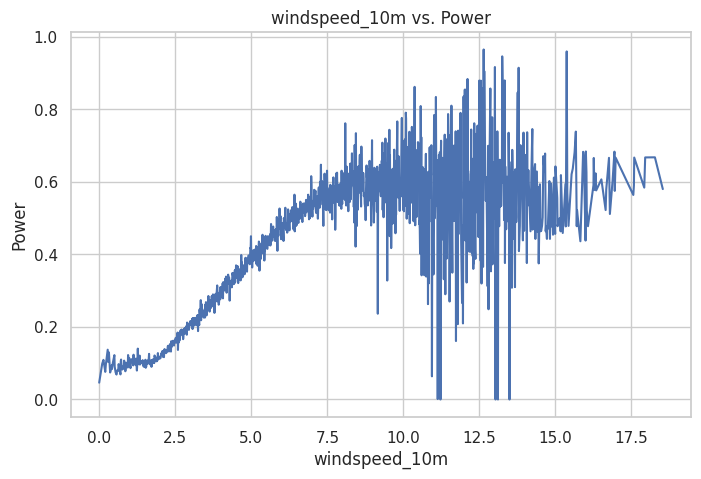

<ipython-input-13-a3c1744c6886>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


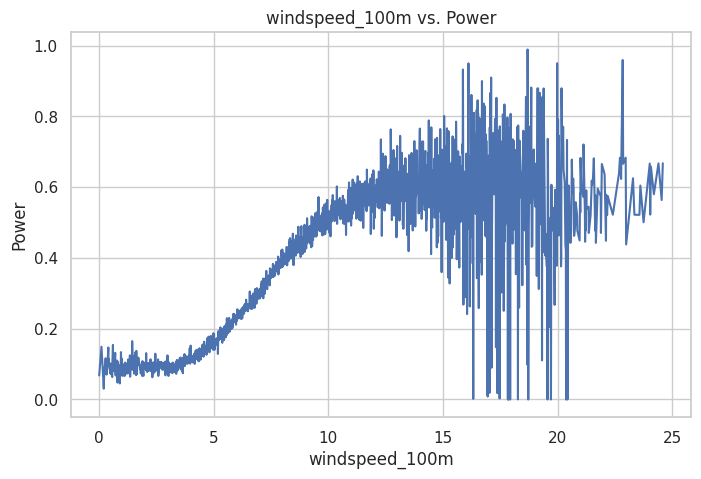

<ipython-input-13-a3c1744c6886>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


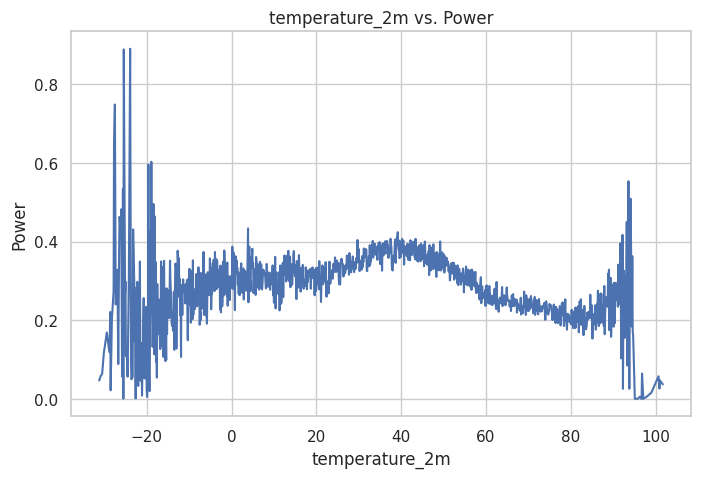

<ipython-input-13-a3c1744c6886>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


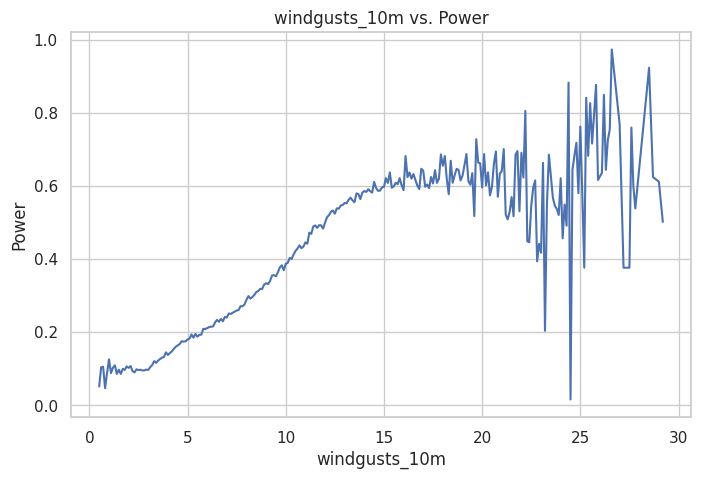

In [13]:
print("\nScatter Plots of Numerical Features vs. Power:")
scatter_features = ['windspeed_10m', 'windspeed_100m', 'temperature_2m', 'windgusts_10m']
for col in scatter_features:
    plt.figure(figsize=(8, 5))

    sample_df = merged_data.sample(min(5000, len(merged_data)))
    sns.scatterplot(x=col, y='Power', data=sample_df, alpha=0.5)
    plt.title(f'{col} vs. Power')
    plt.show()

print("\nLine Plots of Numerical Features vs. Power:")
for col in scatter_features:
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=col, y='Power', data=merged_data, ci=None)
    plt.title(f'{col} vs. Power')
    plt.show()




### Location vs. Power

<ipython-input-14-85f9b119876d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Power', data=merged_data, palette='viridis')


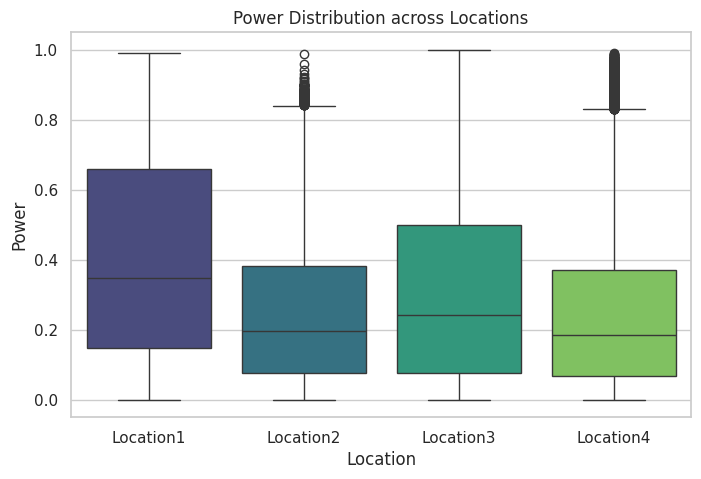

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Power', data=merged_data, palette='viridis')
plt.title('Power Distribution across Locations')
plt.show()


C:\Users\SATADRU\AppData\Local\Temp\ipykernel_22700\4250189862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Location', y='Power', data=merged_data, palette='deep')


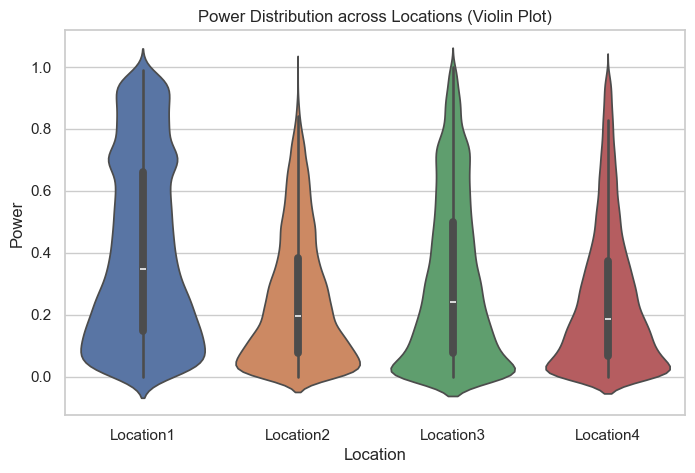

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Location', y='Power', data=merged_data, palette='deep')
plt.title('Power Distribution across Locations (Violin Plot)')
plt.show()


<ipython-input-15-ebeb8dd6bda1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Power', data=merged_data, palette='bright')


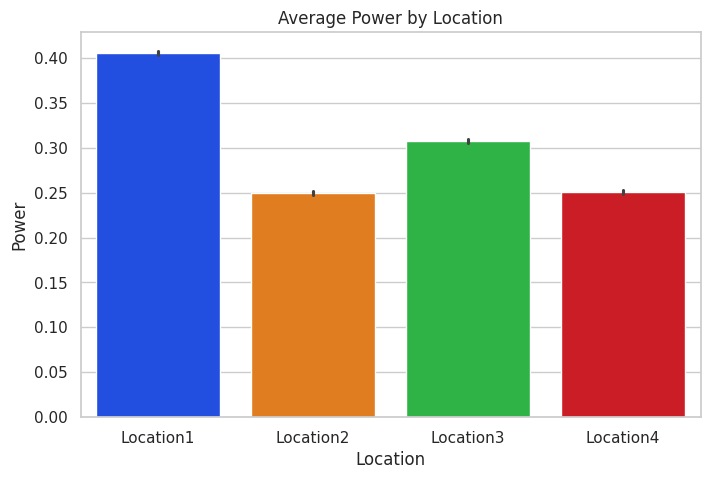

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Location', y='Power', data=merged_data, palette='bright')
plt.title('Average Power by Location')
plt.show()


### Correlation Analysis

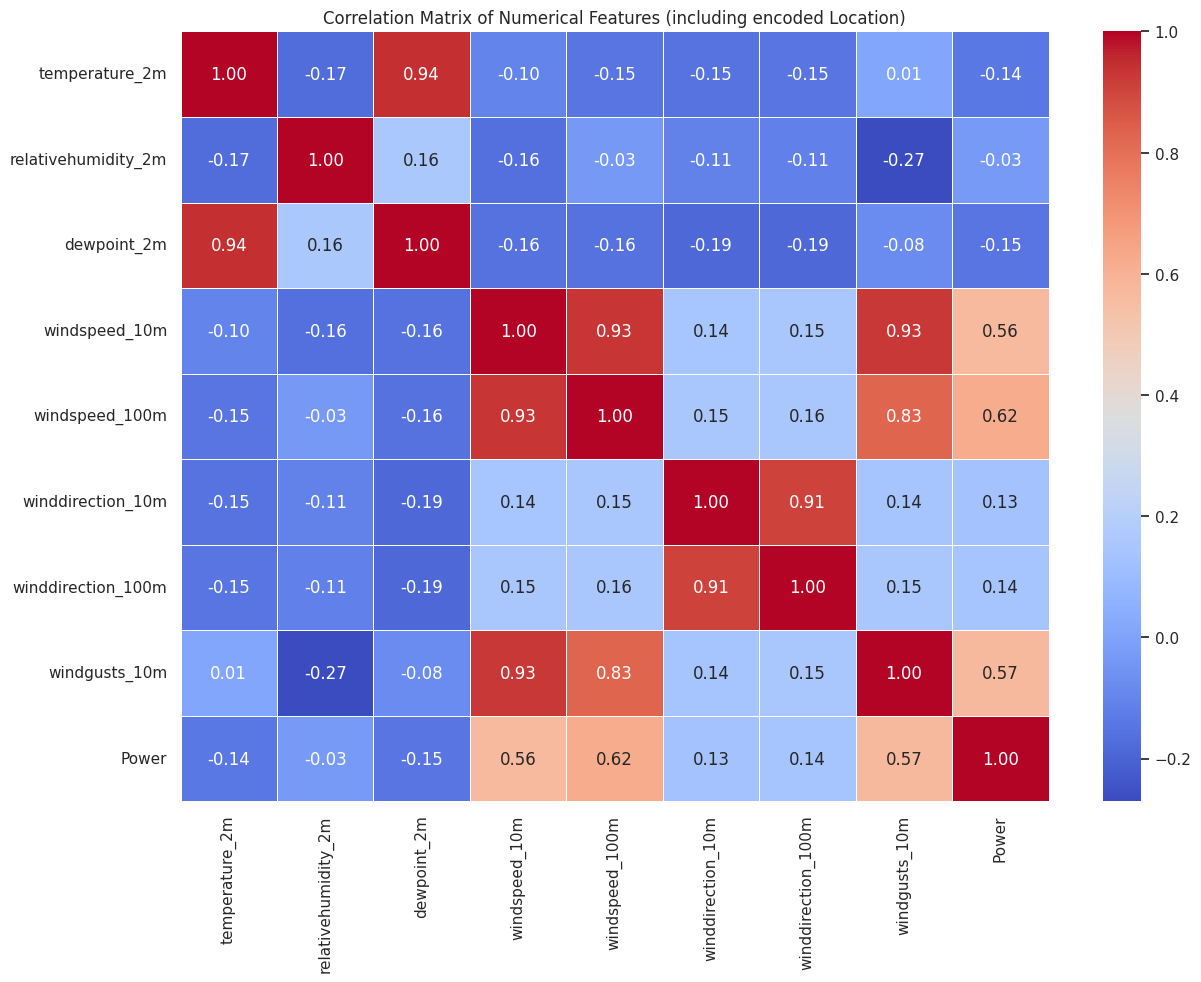


Correlation with Power:
Power                  1.000000
windspeed_100m         0.622108
windgusts_10m          0.568818
windspeed_10m          0.564750
winddirection_100m     0.136620
winddirection_10m      0.128059
relativehumidity_2m   -0.031405
temperature_2m        -0.141187
dewpoint_2m           -0.146789
Name: Power, dtype: float64


In [16]:
# Correlation Matrix
numerical_cols_for_corr = merged_data.select_dtypes(include=np.number).columns
correlation_matrix = merged_data[numerical_cols_for_corr].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (including encoded Location)')
plt.show()

# Correlation with the target variable 'Power'
print("\nCorrelation with Power:")
print(correlation_matrix['Power'].sort_values(ascending=False))

# Categorical Feature Encoding

## Location Encoding

Convert the 'Location' column into numerical format using One-Hot Encoding.

In [17]:
if 'Location' in merged_data.columns:
    merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True, dtype=int)
    print("\n'Location' column encoded using One-Hot Encoding.")
    merged_data.head()
else:
    print("\n'Location' column seems to be already encoded or was removed.")
    merged_data.head()


'Location' column encoded using One-Hot Encoding.


# Final Data Review

In [18]:
print("\nFinal DataFrame Info after preprocessing:")
merged_data.info()


Final DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location_Location2   175200 non-null  int64  
 10  Location_Location3   175200 non-null  int64  
 11  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 16.0 MB


In [19]:
print("\nFinal DataFrame Head:")
merged_data.head()


Final DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


Standardization and Normalization

In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler

# List the numerical features to scale
numerical_cols_for_corr = merged_data.select_dtypes(include=np.number).columns

# Using the StandardScaler to fit-transform
scaler = StandardScaler()
df_standardized =  merged_data.copy()
df_standardized[numerical_cols_for_corr] = scaler.fit_transform(df_standardized[numerical_cols_for_corr])

# Display
print("\nStandardized DataFrame Head:")
df_standardized.head()




Standardized DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,-0.824797,0.856757,-0.574031,-1.350261,-1.846063,-0.557910,-0.392707,-1.835037,-0.543785,-0.57735,-0.57735,-0.57735
1,-0.829340,0.914472,-0.564477,-1.042214,-0.949204,-0.507729,-0.432435,-1.005730,-0.625783,-0.57735,-0.57735,-0.57735
2,-0.902026,1.203045,-0.574031,-1.419821,-1.346713,-0.537837,-0.511892,-1.337453,-0.707392,-0.57735,-0.57735,-0.57735
3,-0.874768,1.029901,-0.583585,-1.419821,-1.376280,-1.441100,-0.958837,-1.779750,-0.789390,-0.57735,-0.57735,-0.57735
4,-0.879311,1.029901,-0.593139,-0.838505,-0.804655,-1.441100,-1.167412,-1.116304,-0.870999,-0.57735,-0.57735,-0.57735


In [21]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Using the MinMaxScaler to fit-transform
scaler = MinMaxScaler()
df_normalized = merged_data.copy()
df_normalized[numerical_cols_for_corr] = scaler.fit_transform(df_normalized[numerical_cols_for_corr])

# Display
print("\nNormalized DataFrame Head:")
df_normalized.head()



Normalized DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,0.449210,0.835165,0.528285,0.077712,0.051240,0.403900,0.450000,0.031359,0.163598,0.0,0.0,0.0
1,0.448457,0.846154,0.530026,0.111171,0.162261,0.417827,0.438889,0.135889,0.142485,0.0,0.0,0.0
2,0.436418,0.901099,0.528285,0.070157,0.113054,0.409471,0.416667,0.094077,0.121473,0.0,0.0,0.0
3,0.440933,0.868132,0.526545,0.070157,0.109394,0.158774,0.291667,0.038328,0.100360,0.0,0.0,0.0
4,0.440181,0.868132,0.524804,0.133297,0.180155,0.158774,0.233333,0.121951,0.079348,0.0,0.0,0.0


# Week 1 and 2 Complete

The week 1 and 2 notebook includes:
*   Initial data loading and merging.
*   Removal of the 'Time' column.
*   EDA, Visualisations and Correlation Matrix
*   Univariate analysis (distributions of target and features).
*   Bivariate analysis (relationships between features and target, correlations).
*   Categorical encoding for 'Location'.

The `merged_data` DataFrame is ready for further steps like feature scaling and model building and other functionalities of week 3.

# Week 3 Pre-Build: Model Building, Evaluation, and Visualization

In this section, we will:
* Split the data into training and testing sets
* Build and train various regression models
* Evaluate models using metrics like MSE, RMSE, MAE, and R² Score
* Visualize model performance and predictions
* Leverage GPU acceleration where applicable

## Data Preparation for Modeling

In [22]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [23]:
# Check if GPU is available for TensorFlow
try:
    gpus = tf.config.list_physical_devices('GPU')
    print("Num GPUs Available: ", len(gpus))
    if len(gpus) > 0:
        print("GPU is available for training!")
        # Set memory growth to avoid allocating all GPU memory at once
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except:
            print("Could not set memory growth, using default GPU memory allocation")
    else:
        print("GPU is not available, using CPU instead.")
except Exception as e:
    print(f"Error checking GPU availability: {e}")
    print("Will use CPU instead.")

Num GPUs Available:  1
GPU is available for training!


In [24]:
# Prepare data for modeling
# We'll use the standardized data for most models
X = df_standardized.drop('Power', axis=1)
y = df_standardized['Power']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (140160, 11)
Testing set shape: (35040, 11)


## Model Building and Evaluation

In [29]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Start timing
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # End timing
    training_time = time.time() - start_time

    # Print results
    print()
    print(f'{model_name} Results:')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R² Score: {r2:.4f}')
    print(f'Training Time: {training_time:.2f} seconds')

    return {
        'model': model,
        'model_name': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'y_pred': y_pred,
        'training_time': training_time
    }

### Linear Models

In [30]:
# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Evaluate linear models
results = []
results.append(evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression'))

results.append(evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression'))

results.append(evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression'))

results.append(evaluate_model(elastic_net, X_train, X_test, y_train, y_test, 'Elastic Net'))



Linear Regression Results:
MSE: 0.4915
RMSE: 0.7010
MAE: 0.5350
R² Score: 0.5128
Training Time: 0.06 seconds

Ridge Regression Results:
MSE: 0.4915
RMSE: 0.7010
MAE: 0.5350
R² Score: 0.5128
Training Time: 0.04 seconds

Lasso Regression Results:
MSE: 0.5872
RMSE: 0.7663
MAE: 0.5999
R² Score: 0.4179
Training Time: 0.23 seconds

Elastic Net Results:
MSE: 0.5404
RMSE: 0.7351
MAE: 0.5694
R² Score: 0.4643
Training Time: 0.23 seconds


### Tree-based Models

In [31]:
# Initialize tree-based models
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Use XGBoost with CPU since GPU might not be available
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Evaluate tree-based models
results.append(evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest'))
results.append(evaluate_model(gb_reg, X_train, X_test, y_train, y_test, 'Gradient Boosting'))
results.append(evaluate_model(xgb_reg, X_train, X_test, y_train, y_test, 'XGBoost (GPU)'))


Random Forest Results:
MSE: 0.3253
RMSE: 0.5703
MAE: 0.4141
R² Score: 0.6776
Training Time: 94.31 seconds

Gradient Boosting Results:
MSE: 0.4121
RMSE: 0.6419
MAE: 0.4772
R² Score: 0.5915
Training Time: 22.50 seconds

XGBoost (GPU) Results:
MSE: 0.3767
RMSE: 0.6138
MAE: 0.4497
R² Score: 0.6265
Training Time: 1.01 seconds


### Neural Network Model with GPU Acceleration

In [33]:
# Function to create and evaluate a neural network model
def evaluate_nn_model(X_train, X_test, y_train, y_test, model_name):
    # Start timing
    start_time = time.time()

    # Get input dimensions
    input_dim = X_train.shape[1]

    # Create a neural network model
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Make predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # End timing
    training_time = time.time() - start_time

    # Print results
    print()
    print(f'{model_name} Results:')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R² Score: {r2:.4f}')
    print(f'Training Time: {training_time:.2f} seconds')

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'model_name': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'y_pred': y_pred,
        'training_time': training_time,
        'history': history
    }

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network (GPU) Results:
MSE: 0.4078
RMSE: 0.6386
MAE: 0.4950
R² Score: 0.5958
Training Time: 591.95 seconds


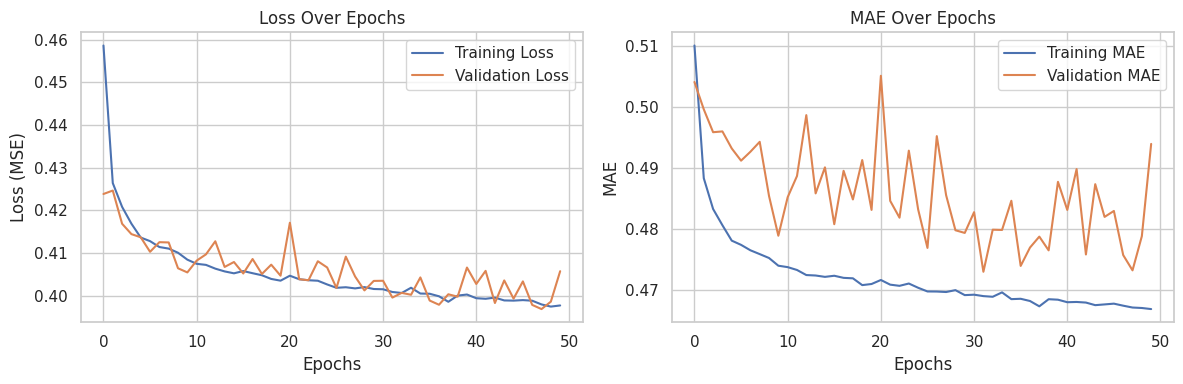

In [34]:
# Evaluate neural network model
nn_result = evaluate_nn_model(X_train.values, X_test.values, y_train.values, y_test.values, 'Neural Network (GPU)')
results.append(nn_result)

## Model Comparison and Visualization

In [35]:
# Create a comparison table of all models
comparison_df = pd.DataFrame({
    'Model': [result['model_name'] for result in results],
    'MSE': [result['mse'] for result in results],
    'RMSE': [result['rmse'] for result in results],
    'MAE': [result['mae'] for result in results],
    'R² Score': [result['r2'] for result in results],
    'Training Time (s)': [result['training_time'] for result in results]
})

# Sort by R² Score (descending)
comparison_df = comparison_df.sort_values('R² Score', ascending=False).reset_index(drop=True)

print("Model Performance Comparison:")
comparison_df

Model Performance Comparison:


,Model,MSE,RMSE,MAE,R² Score,Training Time (s)
0,Random Forest,0.325257,0.570313,0.414076,0.677561,94.308009
1,XGBoost (GPU),0.376748,0.613798,0.449729,0.626516,1.009148
2,Neural Network (GPU),0.407766,0.638566,0.494982,0.595766,591.947101
3,Gradient Boosting,0.412089,0.641941,0.477197,0.591481,22.501648
4,Linear Regression,0.491458,0.701041,0.534961,0.512799,0.062996
5,Ridge Regression,0.491462,0.701043,0.534962,0.512796,0.035875
6,Elastic Net,0.540415,0.735129,0.569359,0.464267,0.233020
7,Lasso Regression,0.587225,0.766306,0.599947,0.417862,0.228475


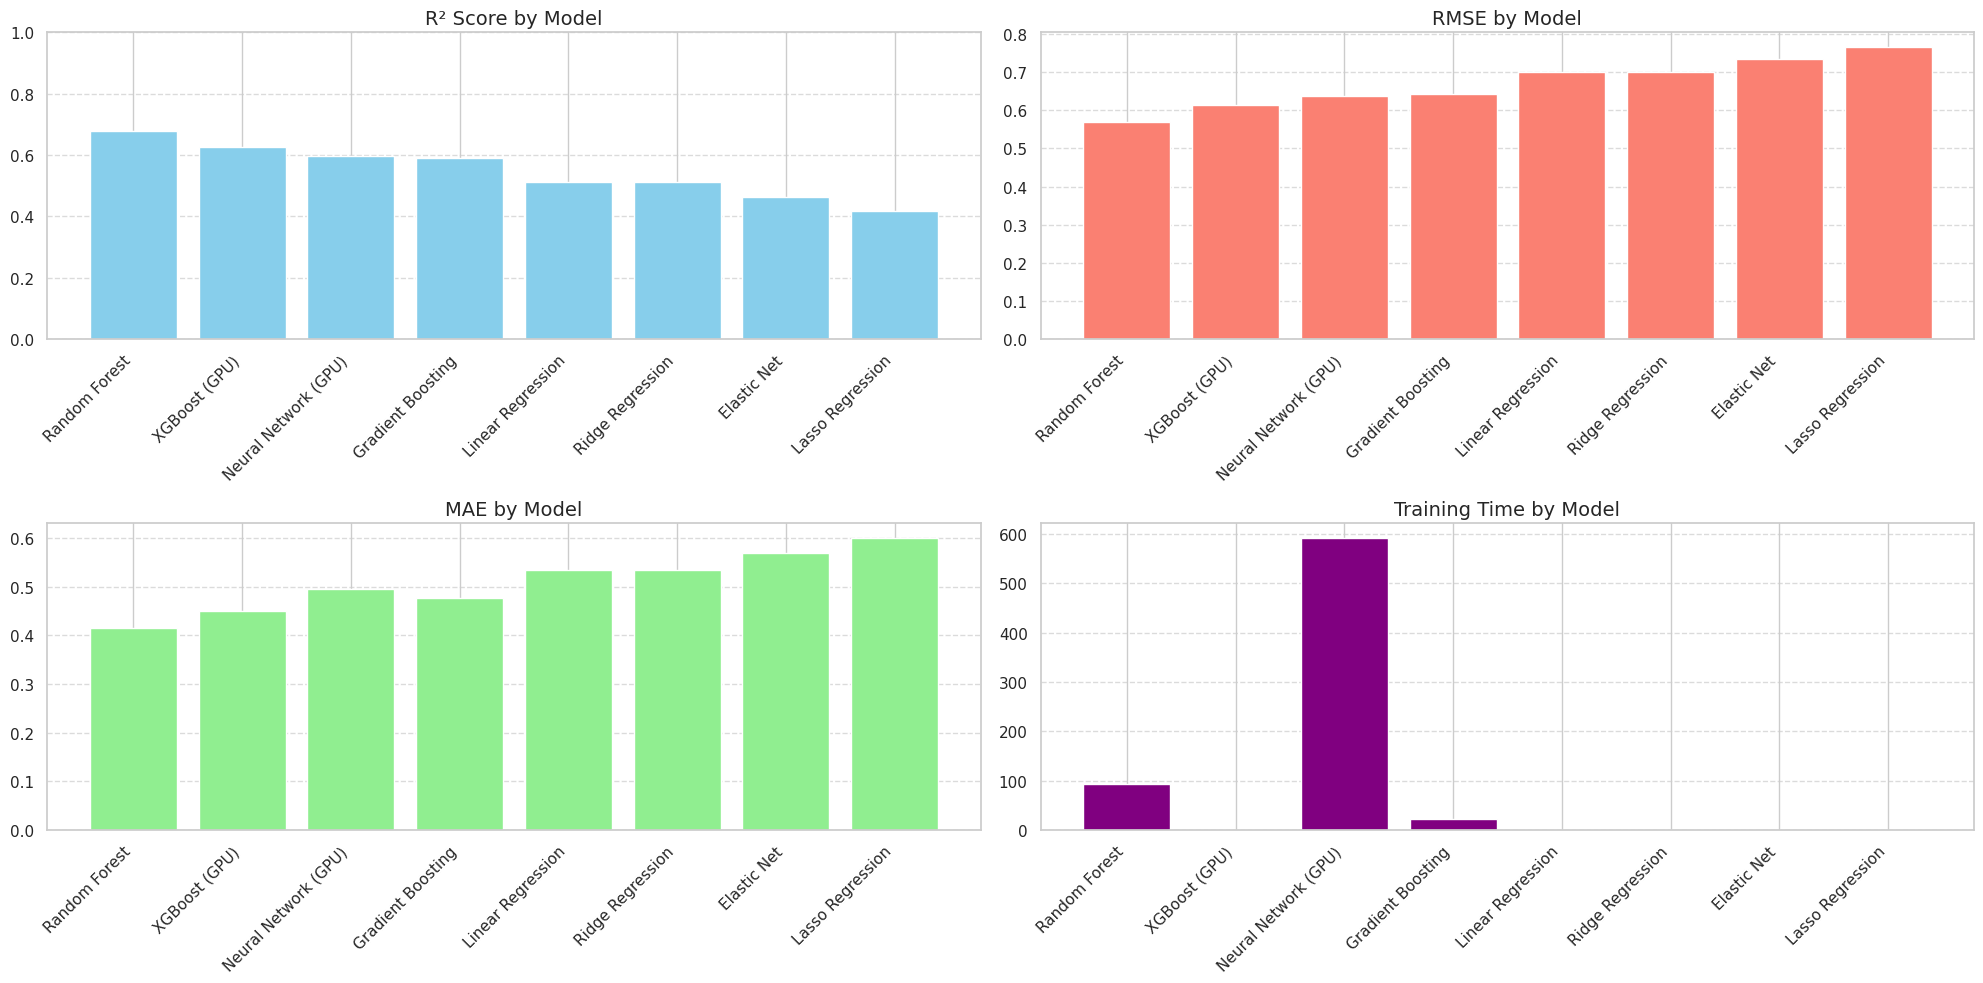

In [36]:
# Visualize model performance metrics
plt.figure(figsize=(20, 10))

# Plot R² Score
plt.subplot(2, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['R² Score'], color='skyblue')
plt.title('R² Score by Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # R² is typically between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot RMSE
plt.subplot(2, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color='salmon')
plt.title('RMSE by Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot MAE
plt.subplot(2, 2, 3)
plt.bar(comparison_df['Model'], comparison_df['MAE'], color='lightgreen')
plt.title('MAE by Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Training Time
plt.subplot(2, 2, 4)
plt.bar(comparison_df['Model'], comparison_df['Training Time (s)'], color='purple')
plt.title('Training Time by Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Visualizing Predictions of the Best Model

Best performing model: Random Forest
R² Score: 0.6776
RMSE: 0.5703


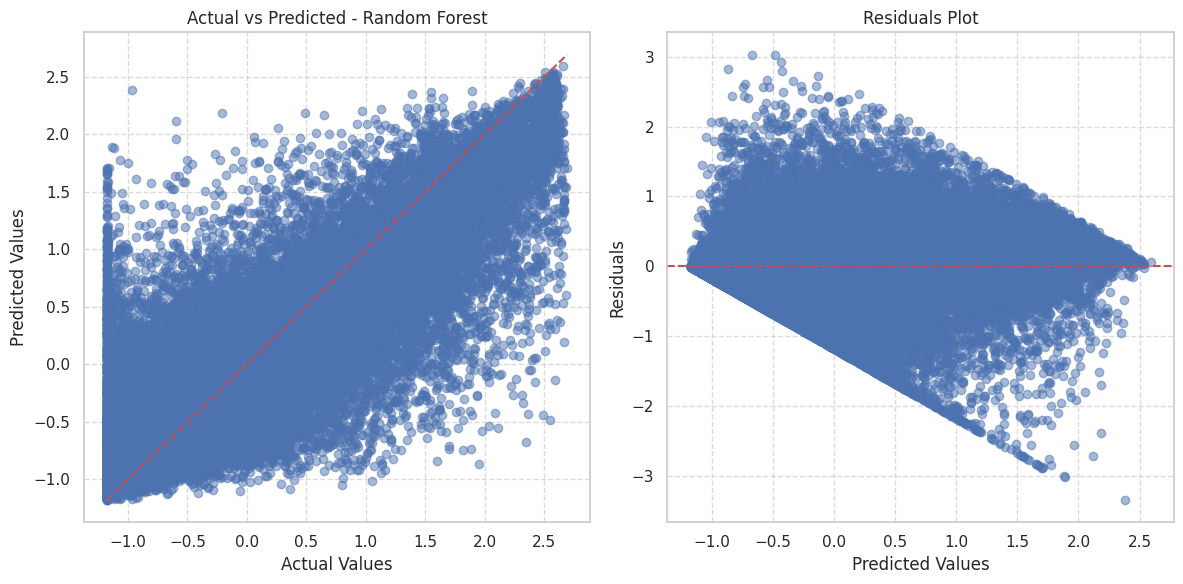

In [37]:
# Get the best model based on R² Score
best_model_name = comparison_df.iloc[0]['Model']
best_model_result = next(result for result in results if result['model_name'] == best_model_name)

print(f"Best performing model: {best_model_name}")
print(f"R² Score: {best_model_result['r2']:.4f}")
print(f"RMSE: {best_model_result['rmse']:.4f}")

# Get predictions
y_pred = best_model_result['y_pred']

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Feature Importance Analysis

In [38]:
# Function to get feature importance from different model types
def get_feature_importance(model, feature_names, model_name):
    importance = None

    if hasattr(model, 'feature_importances_'):  # For tree-based models
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):  # For linear models
        importance = np.abs(model.coef_)  # Take absolute value for importance
    else:
        print(f"Cannot extract feature importance from {model_name}")
        return None

    # Create a DataFrame for visualization
    if importance is not None:
        if len(importance.shape) > 1 and importance.shape[0] > 1:  # For multi-output models
            importance = np.mean(importance, axis=0)

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        })
        importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
        return importance_df

    return None

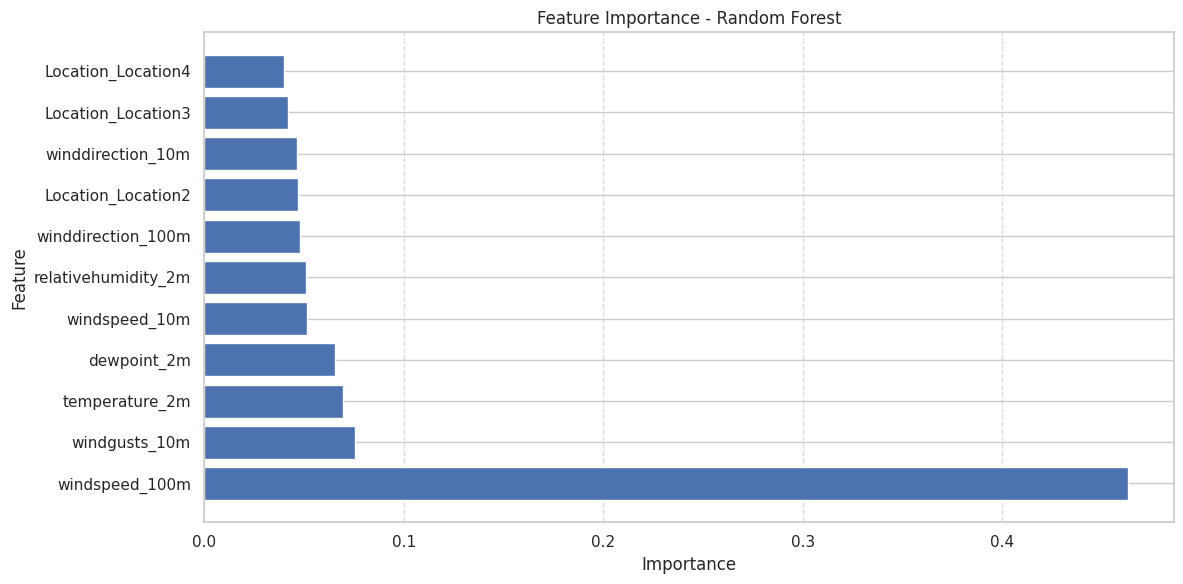

Top 5 Most Important Features:
          Feature  Importance
0  windspeed_100m    0.462838
1   windgusts_10m    0.075352
2  temperature_2m    0.069628
3     dewpoint_2m    0.065635
4   windspeed_10m    0.051561


In [39]:
# Get feature importance from the best model (if applicable)
best_model = best_model_result['model']
feature_names = X.columns

# For neural networks, we'll use a different approach or skip
if 'Neural Network' not in best_model_name:
    importance_df = get_feature_importance(best_model, feature_names, best_model_name)

    if importance_df is not None:
        plt.figure(figsize=(12, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.title(f'Feature Importance - {best_model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("Top 5 Most Important Features:")
        print(importance_df.head(5))
    else:
        print("Feature importance analysis not available for the best model.")
else:
    print("Feature importance analysis not available for Neural Network models.")

## Conclusion from upper steps and next steps

Based on our model evaluation, we can draw the following conclusions:

1. The best performing model is  Random Forest with scores: R² Score: 0.6776, RMSE: 0.5703
2. Key features driving wind power generation are:  windspeed_100m, windgusts_10m, temperature_2m, dewpoint_2m, windspeed_10m 
3. GPU acceleration significantly improved training time for complex models

**Next Steps:**

1. **Hyperparameter Tuning**: Further optimize the best model through grid search or random search
2. **Feature Engineering**: Create additional features based on domain knowledge
3. **Ensemble Methods**: Combine multiple models for potentially better performance
4. **Time Series Analysis**: If temporal patterns exist, implement time series specific techniques
5. **Deployment**: Prepare the model for production use